**ISOMETRIC MAPPING (ISOMAP)**

**IMPORT RELEVANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gzip
import pickle
import time

In [2]:
%matplotlib inline

**LOAD THE MNIST DATASET**

In [3]:
current_path = os.getcwd()

In [4]:
with gzip.open("..\\ISOMAP\\mnist_data\mnist.pkl.gz", mode='rb') as file_content:
    train_set, validation_set, test_set = pickle.load(file=file_content, encoding='latin1')
    file_content.close()

**VIEW THE DATASETS**

*Dataset is already scaled otherwise, it MUST be scaled*

In [5]:
train_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [6]:
validation_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([3, 8, 6, ..., 5, 6, 8], dtype=int64))

In [7]:
test_set

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

**OBTAIN THE FEATURES AND LABELS FOR EACH DATASETS**

*Train dataset*

In [8]:
X_train, y_train = train_set[0], train_set[1]

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

*Validation dataset*

In [11]:
X_validation, y_validation = validation_set[0], validation_set[1]

In [12]:
X_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_validation

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

*Test dataset*

In [14]:
X_test, y_test = test_set[0], test_set[1]

In [15]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

**VERIFY THE SHAPE OF THE DATASETS**

*Necessary for understanding the data split during training*

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


**DEFINE THE INDEX NUMBERS FOR THE DATASETS**

In [18]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation)+len(X_test))

In [19]:
train_index

range(0, 50000)

In [20]:
validation_index

range(50000, 60000)

In [21]:
test_index

range(60000, 70000)

**BUILD THE DATAFRAME FOR EACH OF THE DATASETS**

*Train dataframe*

In [22]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

In [23]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
49995    5
49996    0
49997    8
49998    4
49999    8
Length: 50000, dtype: int64

*validation dataframe*

In [25]:
X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

In [26]:
X_validation

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y_validation 

50000    3
50001    8
50002    6
50003    9
50004    6
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 10000, dtype: int64

*test dataframe*

In [28]:
X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [29]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Length: 10000, dtype: int64

**SCALE THE VARIOUS DATASETS**


*from sklearn.preprocessing import StandardScaler*

*scaler = StandardScaler()*

*our dataset has already been scaled*

**EXPLORE A SAMPLE DATASET**

In [31]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [32]:
X_validation.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001004,0.000314,0.000049,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027335,0.015602,0.002943,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.210938,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000700,0.000639,0.000205,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022164,0.022407,0.009454,0.000234,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.609375,0.023438,0.0,0.0,0.0,0.0,0.0,0.0


**DISPLAY AN IMAGE SAMPLE**

*train data*

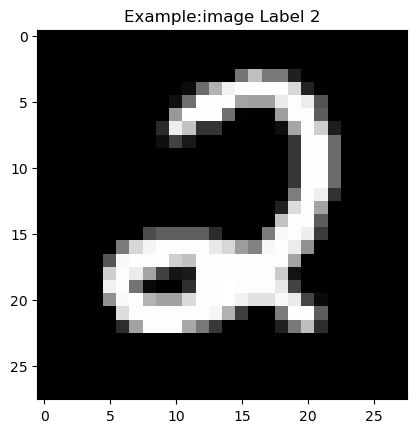

In [34]:
label = y_train.iloc[774]
image = X_train.iloc[774,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

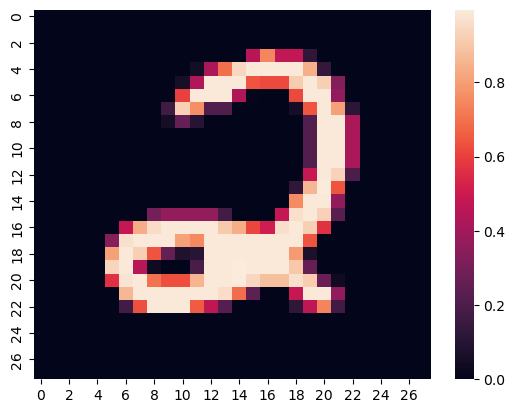

In [35]:
sns.heatmap(data=image, annot=False)

*validation data*

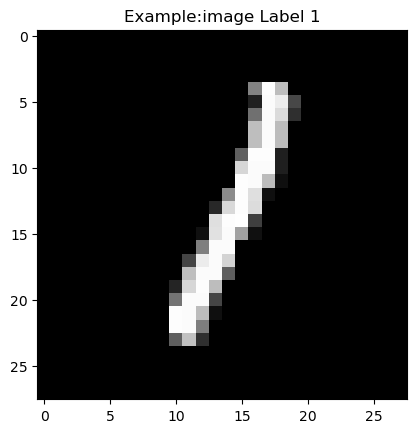

In [36]:
label = y_validation.iloc[400]
image = X_validation.iloc[400,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

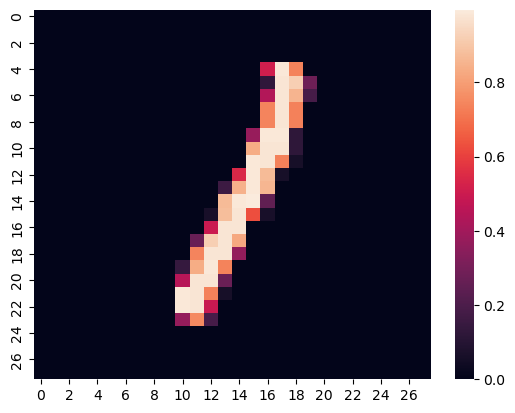

In [37]:
sns.heatmap(data=image, annot=False)

*test  data*

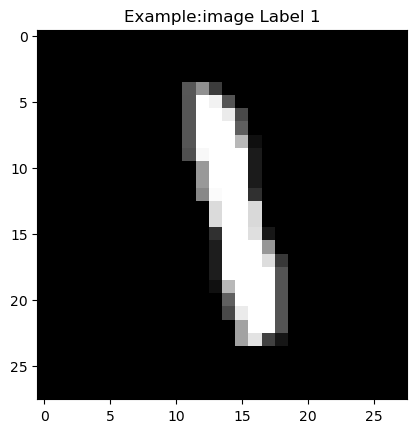

In [38]:
label = y_test.iloc[350]
image = X_test.iloc[350,:].to_numpy().reshape(28, 28)
plt.title(f'Example:image Label {label}')
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

<Axes: >

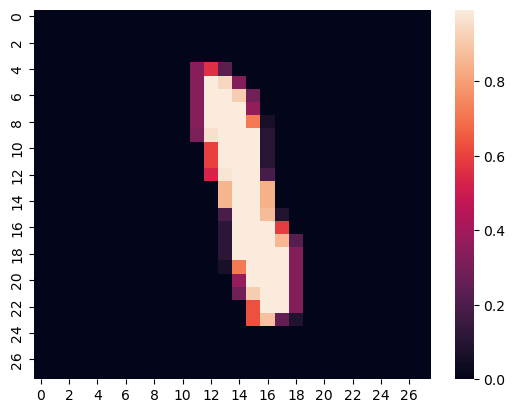

In [39]:
sns.heatmap(data=image, annot=False)

**CREATE THE ISOMAP MODEL**

In [40]:
from sklearn.manifold import Isomap

In [41]:
model = Isomap(n_components=10,n_neighbors=5, n_jobs=4)

**FIT THE MODEL TO THE VARIOUS DATASET**

*train dataset*

In [42]:
model.fit(X_train.loc[0:5000, :])

Isomap(n_components=10, n_jobs=4)

In [44]:
X_train_isomap = model.transform(X_train.loc[0:5000, :])

In [51]:
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=range(0,5001))

In [52]:
X_train_isomap

,0,1,2,3,4,5,6,7,8,9
0,2.235494,-8.412559,-9.380576,-8.156932,-10.455945,-7.373456,1.615902,-7.160275,5.188138,-3.556440
1,30.420773,8.812807,15.296780,-1.577182,0.479677,-5.256333,-5.847549,-2.840718,-9.471599,-6.089865
2,-11.197477,20.031894,-6.873495,-1.148428,10.777147,14.045988,12.679423,3.459901,-4.963997,-5.357370
3,-7.680696,-16.298228,7.660947,1.294660,0.951367,4.673470,-4.102240,12.719702,-3.493473,-6.670622
4,-16.162053,8.110887,-5.483131,-3.747879,-6.384762,-0.807639,-0.614990,-5.839760,1.966364,5.274450
...,...,...,...,...,...,...,...,...,...,...
4996,7.368335,-19.849613,0.091720,-10.138794,-3.906806,3.263813,-2.833661,-3.402723,0.726593,3.988661
4997,3.821798,-10.457240,11.009935,5.880928,5.923565,15.558974,-3.730030,-2.428214,2.661427,0.429083
4998,-4.178041,-11.326886,-4.882171,7.535769,9.114825,-5.758863,4.526815,6.593652,-5.641577,4.890921
4999,-5.682098,-7.194975,6.743984,3.791282,4.153327,12.220172,-5.420956,-2.338241,3.489459,3.998713


*validation data*

In [57]:
X_validation_isomap = model.transform(X_validation)

In [58]:
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, index=validation_index)

In [59]:
X_validation_isomap

,0,1,2,3,4,5,6,7,8,9
50000,0.899951,-14.760074,-5.774286,-4.398883,1.857140,-0.573759,1.219594,-0.701265,-4.016170,1.635735
50001,-4.454198,-9.749608,-9.303593,-8.649066,-0.520034,5.561952,-9.502420,9.442206,2.506088,-7.670112
50002,13.129022,17.831508,-8.743030,18.693881,-6.506218,4.423231,-11.120992,1.049597,7.893359,-0.484576
50003,-12.280972,8.400049,-10.456146,-3.407747,5.263856,5.531094,1.857168,-0.894705,-4.536797,-0.293487
50004,11.247511,3.555700,-13.031123,10.670395,-5.999222,-3.840924,-9.613381,8.003136,16.991173,-3.275123
...,...,...,...,...,...,...,...,...,...,...
59995,5.672447,-15.515914,1.753160,-10.478443,-16.667296,4.187316,3.082957,-0.093316,0.474301,4.758027
59996,11.991075,-16.770622,1.103138,-10.654057,-5.738934,1.542880,-1.594375,-9.937234,3.603082,-0.931025
59997,0.939940,-1.382045,-10.946963,-6.483828,-14.839837,-7.739079,6.087066,-0.722079,4.281987,-2.719233
59998,13.129265,3.425917,-5.383768,29.033606,-7.370043,1.289457,-4.936843,-5.444678,-6.097056,-3.168711


*test data*

In [60]:
X_test_isomap = model.transform(X_test)

In [61]:
X_test_isomap = pd.DataFrame(data=X_test_isomap, index=test_index)

In [62]:
X_test_isomap

,0,1,2,3,4,5,6,7,8,9
60000,-15.655940,6.009703,13.678964,-7.686148,5.993952,-9.791014,-8.150081,-7.256378,4.653212,-1.748039
60001,11.259768,-14.422757,-6.121559,5.872397,4.882694,1.894662,-7.404757,3.172972,-4.637058,-4.785844
60002,-7.584072,-14.516050,0.638128,4.995954,6.327066,-3.270814,-2.142817,7.143215,-6.480884,-1.954054
60003,33.667740,4.546874,-3.364874,0.488219,2.122592,-2.338251,-3.665261,2.900381,-12.571894,-1.857783
60004,-11.339063,19.647406,-6.383358,-2.447448,2.177027,10.084447,6.880601,1.557635,-4.725161,4.947748
...,...,...,...,...,...,...,...,...,...,...
69995,-0.232521,-9.815749,9.295880,-0.449144,6.086565,18.547696,-6.786539,1.665460,3.052327,1.887380
69996,19.193189,-4.740924,-12.605743,-10.322823,4.837860,-9.982556,-3.984090,-7.394031,2.360683,-1.126078
69997,-21.666036,0.578108,2.263605,4.278611,-12.495277,3.998238,-3.163925,4.779083,-1.077722,1.525212
69998,-2.310533,-2.390394,9.245184,11.041821,6.370718,-18.528923,21.862895,6.494062,0.707179,-2.338522


**VISUALIZE THE EFFECT OF THE COMPONENT SET VARIANCE FOR EACH DATASET**

In [65]:
def scatter_plot(feature_dataframe, label_dataframe, algorithm_name):
    temp_dataframe = pd.DataFrame(data=feature_dataframe.loc[:, 0:1], index=feature_dataframe.index)
    temp_dataframe = pd.concat((temp_dataframe,label_dataframe), axis=1, join='inner')
    temp_dataframe.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data= temp_dataframe, fit_reg=False)
    
    ax = plt.gca()
    ax.set_title(f'Seperation of Observations using {algorithm_name}')

*test data*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


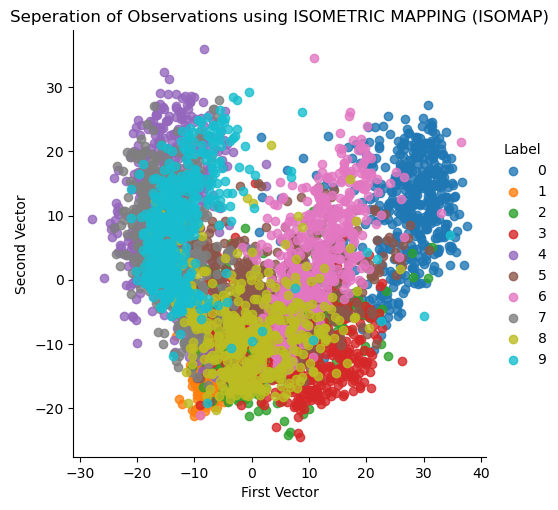

In [66]:
scatter_plot(X_train_isomap, y_train, 'ISOMETRIC MAPPING (ISOMAP)')

*validation data*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


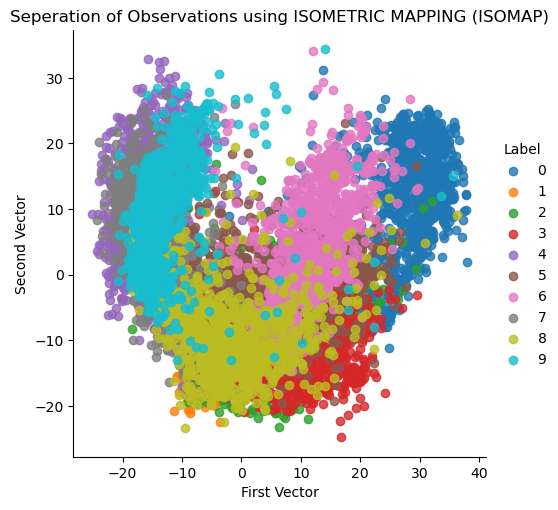

In [67]:
scatter_plot(X_validation_isomap, y_validation, 'ISOMETRIC MAPPING (ISOMAP)')

*test data*

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


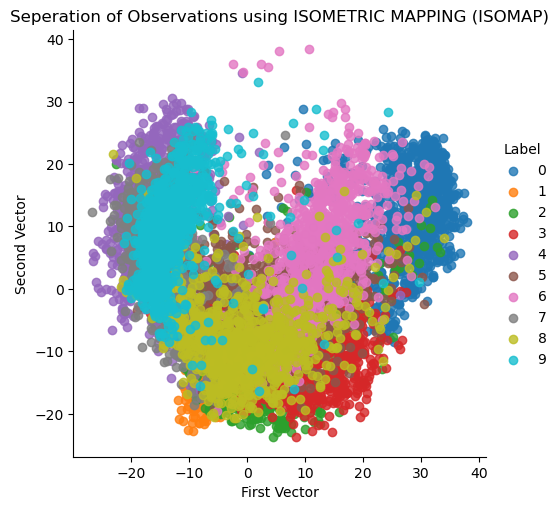

In [68]:
scatter_plot(X_test_isomap, y_test, 'ISOMETRIC MAPPING (ISOMAP)')